In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import labelme
import math
from skimage.transform import resize
from skimage import img_as_ubyte
import random

%matplotlib inline

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.model import log

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "datasets", "cstr")

Using TensorFlow backend.


In [46]:
from samples.cstr.cstr import CstrConfig

class InferenceConfig(CstrConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(MODEL_DIR, "cstr20180412T1517", "mask_rcnn_cstr_0011.h5")
model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /home/wanyingge/Mask_RCNN/logs/cstr20180412T1517/mask_rcnn_cstr_0016.h5


In [9]:
from samples.cstr.cstr import CstrDataset
# Training dataset.
dataset_train = CstrDataset()
dataset_train.load_data(IMAGE_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = CstrDataset()
dataset_val.load_data(IMAGE_DIR, 'val')
dataset_val.prepare()

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000
image_meta               shape: (39,)                 min:    0.00000  max:  945.00000
gt_class_id              shape: (5,)                  min:    8.00000  max:   20.00000
gt_bbox                  shape: (5, 4)                min:    1.00000  max:  512.00000
gt_mask                  shape: (512, 512, 5)         min:    0.00000  max:    1.00000


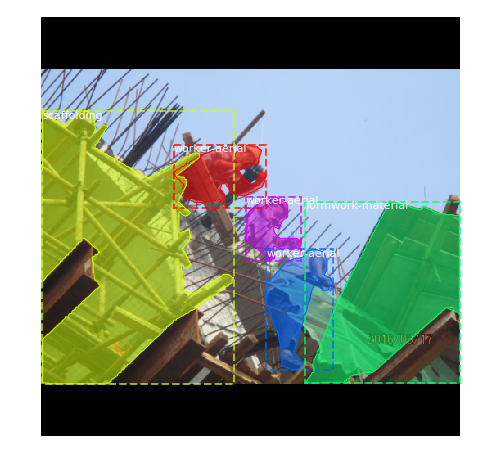

In [38]:
# Test on a random image
# image_id = random.choice(dataset_val.image_ids)
image_id = 945
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

945
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max:  512.00000


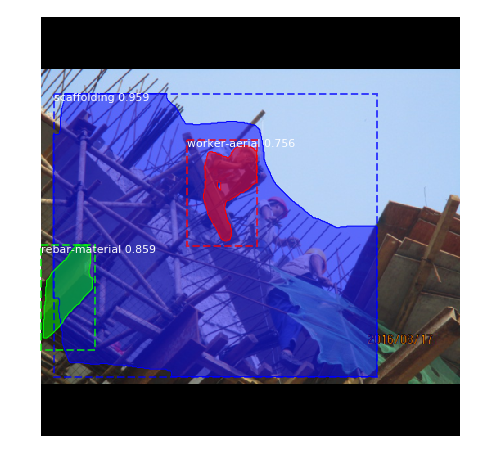

In [39]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

print(image_id)
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

AgADBQAD9acxGwvB-VZFW4uUo2AV3OFk0zIABFL8ohtlyNyUkJgBAAEC.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


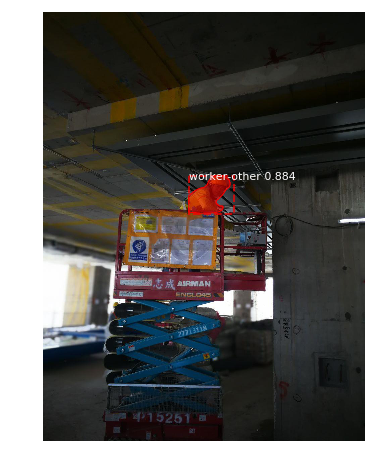

AgADBQADtacxGzlDiVbt7x6KMgfvbzMoyjIABHh_pvgrp0cG1xgCAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


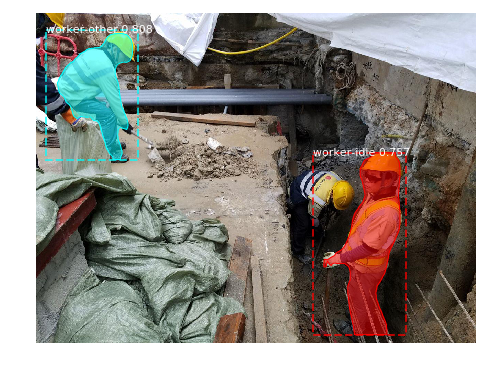

AgADBQADDKgxGyIDqVav3UQqzzMY8fAmyjIABMz1NyAWJG2tsDUCAAEC.jpeg
Processing 1 images
image                    shape: (872, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  146.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


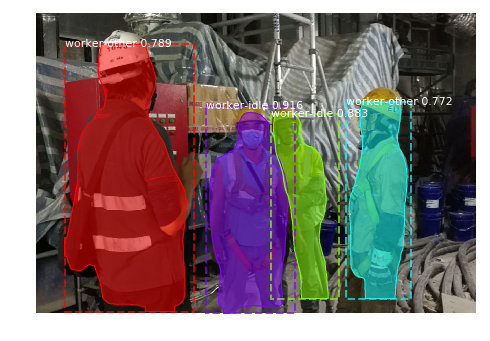

AgADBQADG6gxG6CxOFcHuLjZwO2lzFyV0DIABAbVeg4TRrZKNaoDAAEC.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


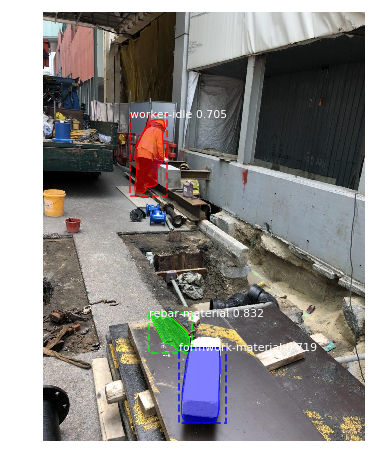

AgADBQAD4KcxG79S-FaLheS1nJeFwBNn0zIABBLotQk6CViPZp0BAAEC.jpeg
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


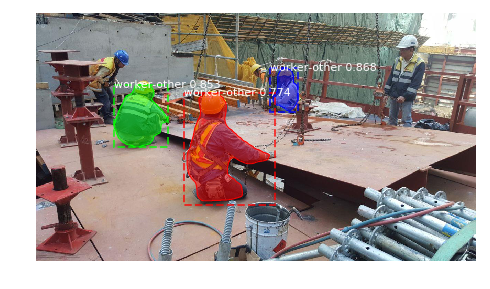

AgADBQADC6gxG4D0WVf7Koj74hYwaU1h0zIABHlK_OKq-MVYNdMBAAEC.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


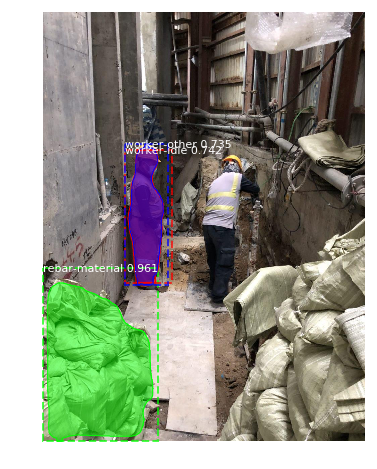

AgADBQAD7KcxG8UqYVa-ePjHe_mII2hf0zIABMoFnH2PtlXGOToBAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


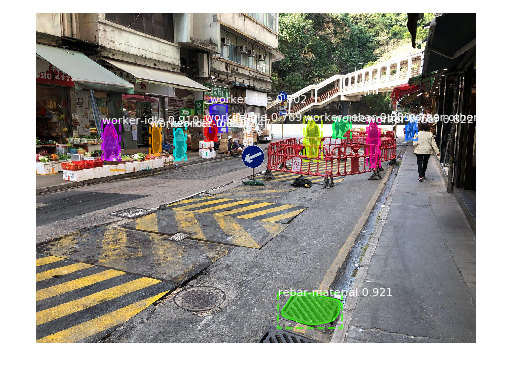

AgADBQADKakxG2jMiFfVYd3KWQ-6rM600zIABLAR7bzlixFf9WgAAgI.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


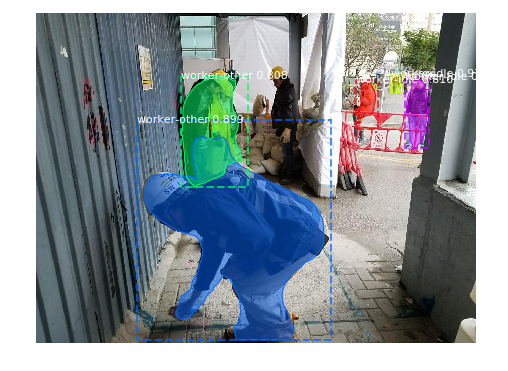

AgADBQAD7acxGydiwVY-6r83bq0mL2x70DIABFu4223LWHtTH3ADAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


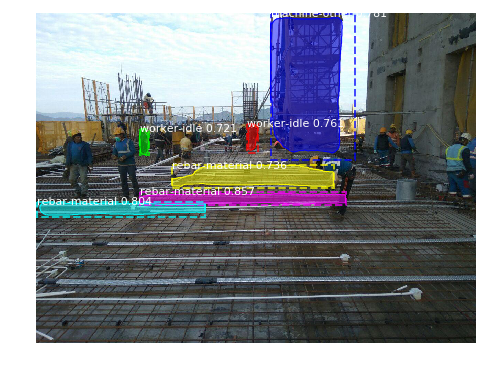

AgADBQAD8KcxG8UqaVZ7imjESxgEAtd-0DIABCTfMRCQClKcdDUDAAEC.jpeg
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


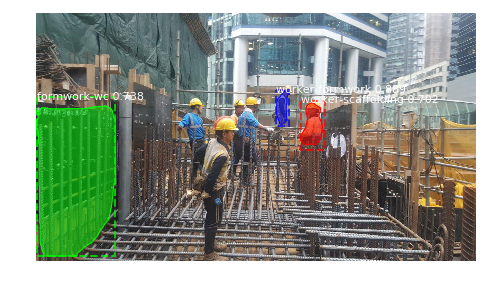

AgADBQADaqkxGzby0VZw-_iVmcxcdul-0DIABGfONt4MlLEezW8DAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


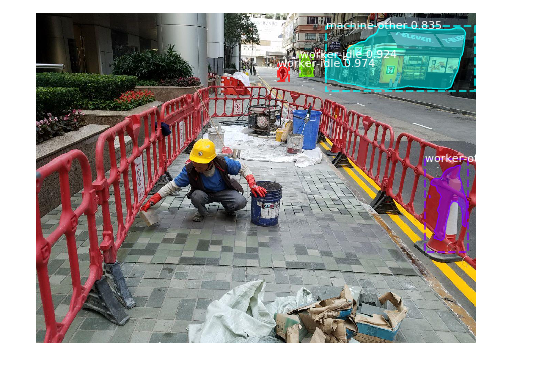

AgADBQAD4KcxG56J8FZQOj_l6i16meCA0DIABJ1KJfmZRc6N7IsDAAEC.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    4.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


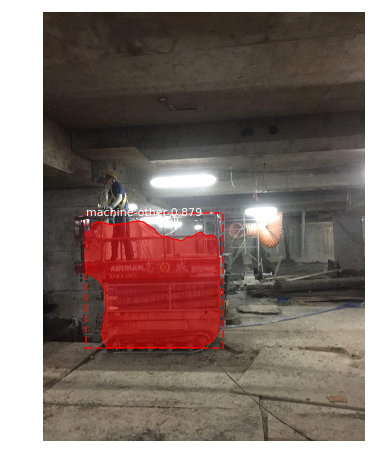

AgADBQADX6gxG2jMgFeg9cMheXhl0-qp0zIABAdVyO5IaU6fSGIAAgI.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


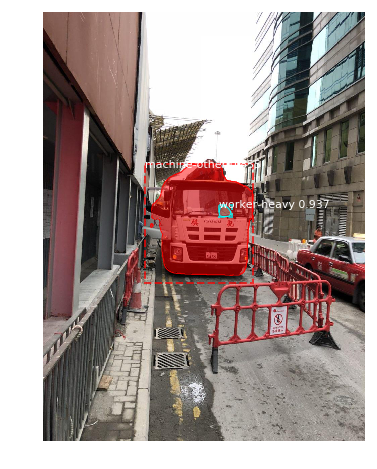

AgADBQADNagxGz3duVZ6h1KzBt2drTO20zIABJDucL5APx4jGAEAAgI.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


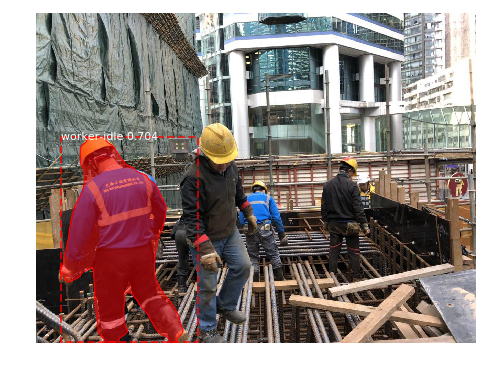

AgADBQAD6qcxG64LYFamI_UMC1eKjGd60DIABGcB9WDlb61XtSoDAAEC.jpeg
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  150.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


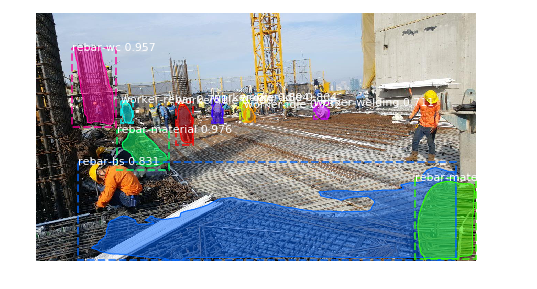

AgADBQADxKcxGzlDiVZ_W9QFtT207ziV0DIABHSQKYc3xydDJkQDAAEC.jpeg
Processing 1 images
image                    shape: (1280, 960, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000

*** No instances to display *** 



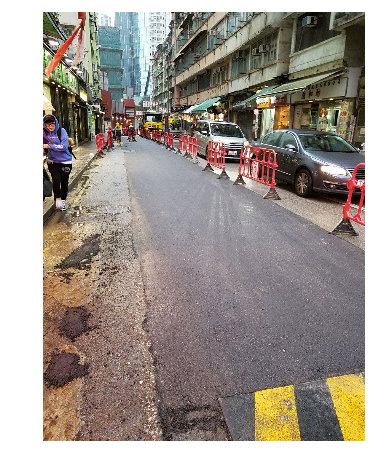

AgADBQAD4qcxG2JhGFevFC9Szv2qrDJh0zIABPBpLvwJ45dGiasBAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


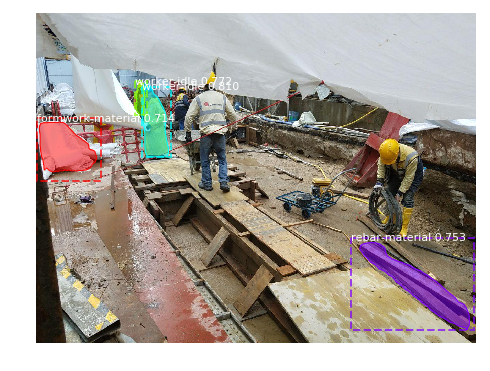

AgADBQAD66cxGyY9iFYtn-8mDLswNyuW0DIABJTGhgaqCxjOL0YDAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  150.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


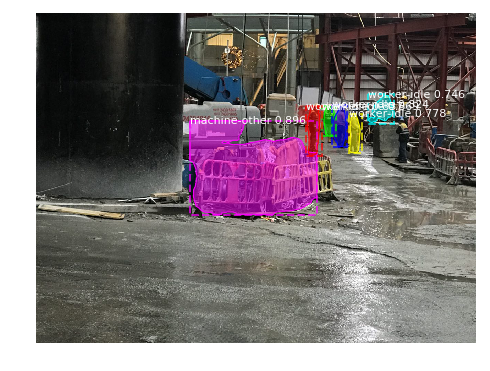

AgADBQAD9acxG1u2eFZl_QiFk2Z1pi0oyjIABB4E5nIJVMko2QkCAAEC.jpeg
Processing 1 images
image                    shape: (960, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


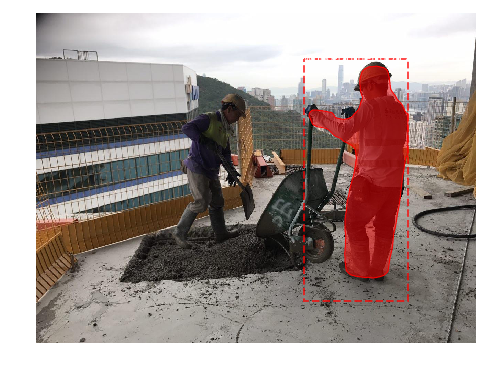

AgADBQADYagxG64LaFYJZpx7a95z0XaB0DIABPcTqgKftM9sVjcDAAEC.jpeg
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 39)               min:    0.00000  max: 1280.00000


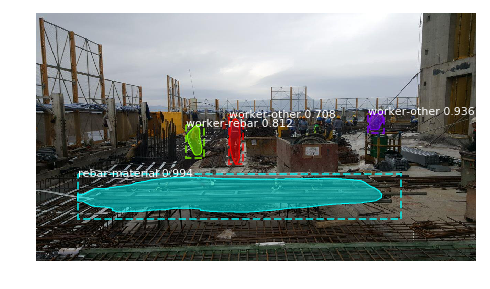

In [47]:
import skimage.io

# Detect on another dataset
NEW_DATASET = os.path.join(ROOT_DIR, "datasets", "PhotosZip-Jan2018")
for image_file in os.listdir(NEW_DATASET)[:20]:
    print(image_file)
    original_image = skimage.io.imread(os.path.join(NEW_DATASET, image_file))
    results = model.detect([original_image], verbose=1)

    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], ax=get_ax())